<a href="https://colab.research.google.com/github/Sravya-Duvvuri/Traffic/blob/main/Yolov8Version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Tue Jun 25 05:25:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir try
!%cd try      #Checking
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/bin/bash: line 1: fg: no job control
100% 6.23M/6.23M [00:00<00:00, 213MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 85.2MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 100.7ms
Speed: 14.2ms preprocess, 100.7ms inference, 1026.0ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/bin/bash: line 1: fg: no job control


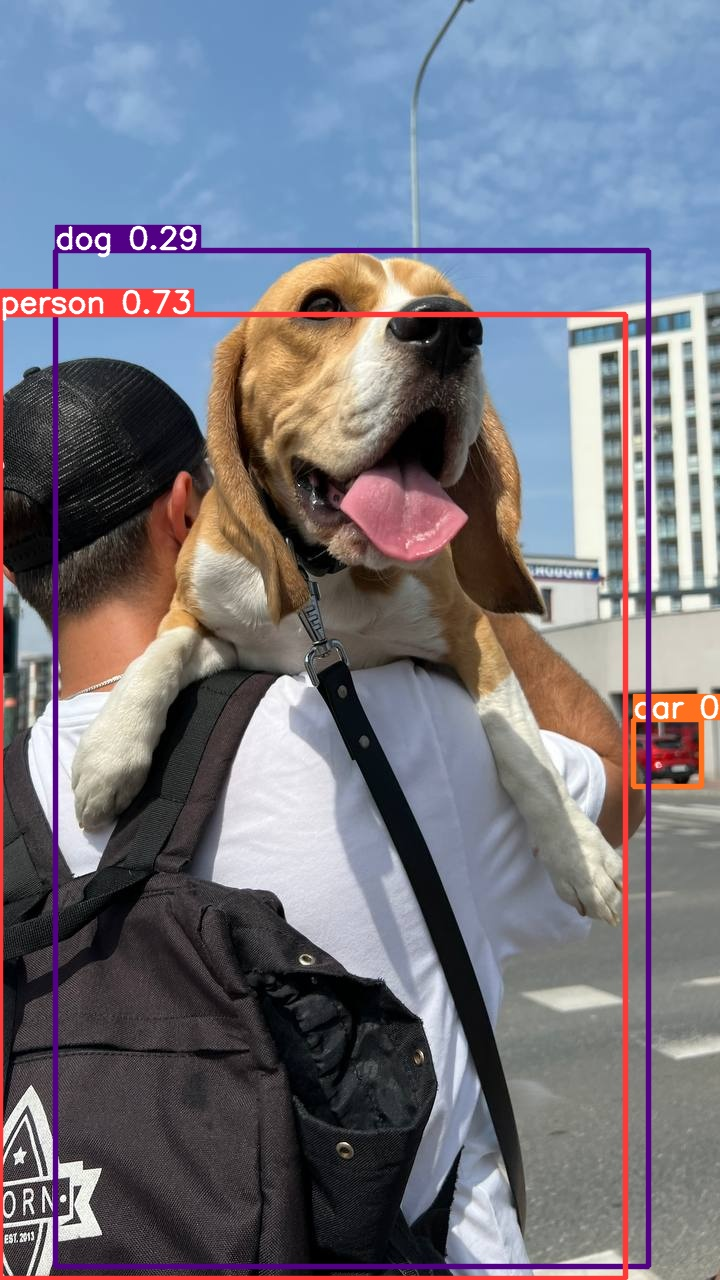

In [ ]:
!%cd try
Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [ ]:
# Install ultralytics package for YOLOv8
!pip install ultralytics --quiet

# Import necessary libraries
import os
from ultralytics import YOLO
from PIL import Image
import IPython.display as display

# Define the 'try' directory path
try_dir = os.path.expanduser("~/try")
os.makedirs(try_dir, exist_ok=True)

# Download the YOLOv8 model if it's not already in the 'try' directory
model_path = f'{try_dir}/yolov8n.pt'
if not os.path.exists(model_path):
    !wget -P {try_dir} https://github.com/ultralytics/yolov8/releases/download/v8.0.0/yolov8n.pt

# Load the YOLOv8 model
model = YOLO(model_path)

# Perform the prediction
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

--2024-06-25 05:28:57--  https://github.com/ultralytics/yolov8/releases/download/v8.0.0/yolov8n.pt
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-06-25 05:28:58 ERROR 404: Not Found.



100%|██████████| 6.23M/6.23M [00:00<00:00, 169MB/s]

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 122.1ms
Speed: 3.3ms preprocess, 122.1ms inference, 573.2ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4717,  625.0754, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

In [ ]:
!pip uninstall -y ultralytics
!pip install ultralytics==8.0.196

Found existing installation: ultralytics 8.0.196
Uninstalling ultralytics-8.0.196:
  Successfully uninstalled ultralytics-8.0.196
  Using cached ultralytics-8.0.196-py3-none-any.whl (631 kB)


In [ ]:
import ultralytics
print(ultralytics.__version__)

8.0.196


In [ ]:
# Ensure the directory exists and navigate to it
import os

dataset_directory = "/content/try/datasets"
if not os.path.exists(dataset_directory):
    os.makedirs(dataset_directory)

%cd {dataset_directory}

# Install roboflow library
!pip install roboflow --quiet

# Import necessary libraries and set up Roboflow
from roboflow import Roboflow

# Initialize Roboflow with your API key
rf = Roboflow(api_key="U9vcNij6BQQCcxEVzcQz")

# Load the specific project and version from Roboflow
project = rf.workspace("traffic-zqyib").project("emergency_vehicles-yetxy")
dataset = project.version(1).download("yolov8")

# Verify the current working directory
!pwd

# List contents to verify dataset download
!ls


/content/try/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.8 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Emergency_Vehicles-1 in yolov8:: 100%|██████████| 6882/6882 [00:01<00:00, 5569.95it/s]


/content/try/datasets
Emergency_Vehicles-1


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/try/datasets/Emergency_Vehicles-1/data.yaml epochs=45 imgsz=800 plots=True

100% 21.5M/21.5M [00:00<00:00, 337MB/s]
New https://pypi.org/project/ultralytics/8.2.42 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/try/datasets/Emergency_Vehicles-1/data.yaml, epochs=45, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_

In [ ]:
!ls /content/try/datasets/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1719293508.3f8804531e9d.2415.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch6055.jpg  weights
P_curve.png					    train_batch6056.jpg
PR_curve.png					    train_batch6057.jpg


/content/try/datasets


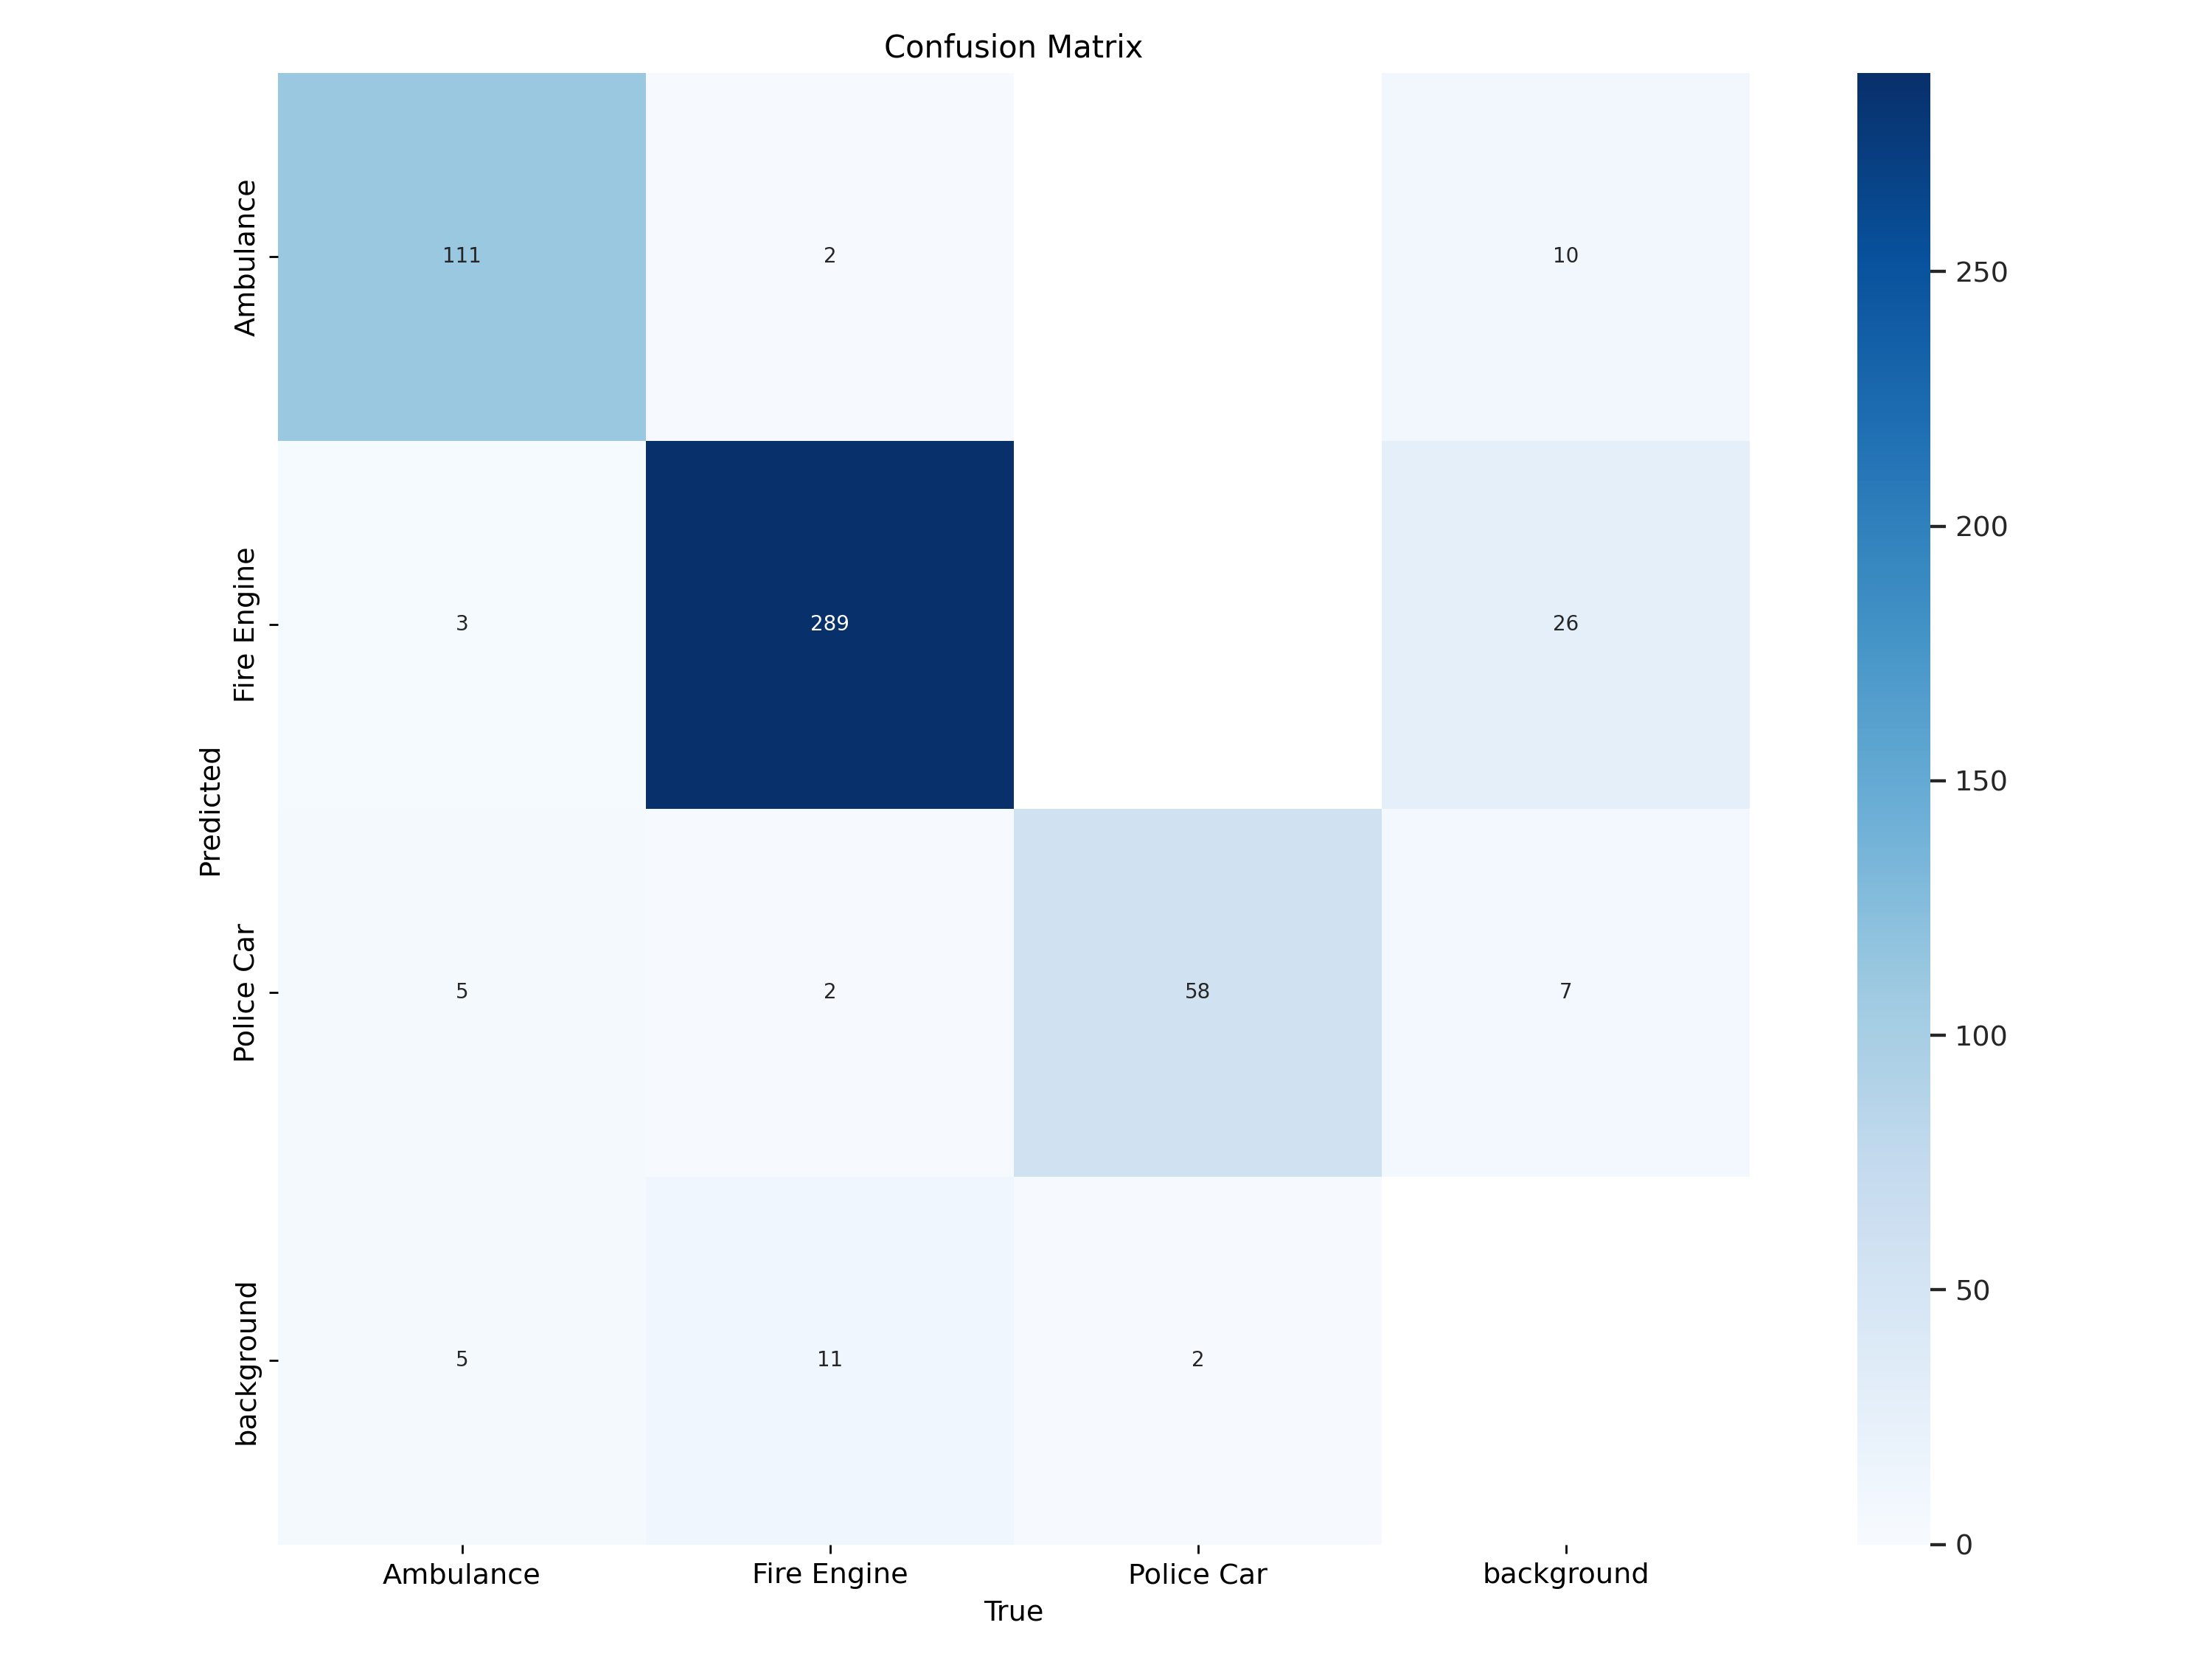

In [ ]:
%cd /content/try/datasets

from IPython.display import Image

Image(filename='/content/try/datasets/runs/detect/train/confusion_matrix.png', width=600)


/content/try/datasets


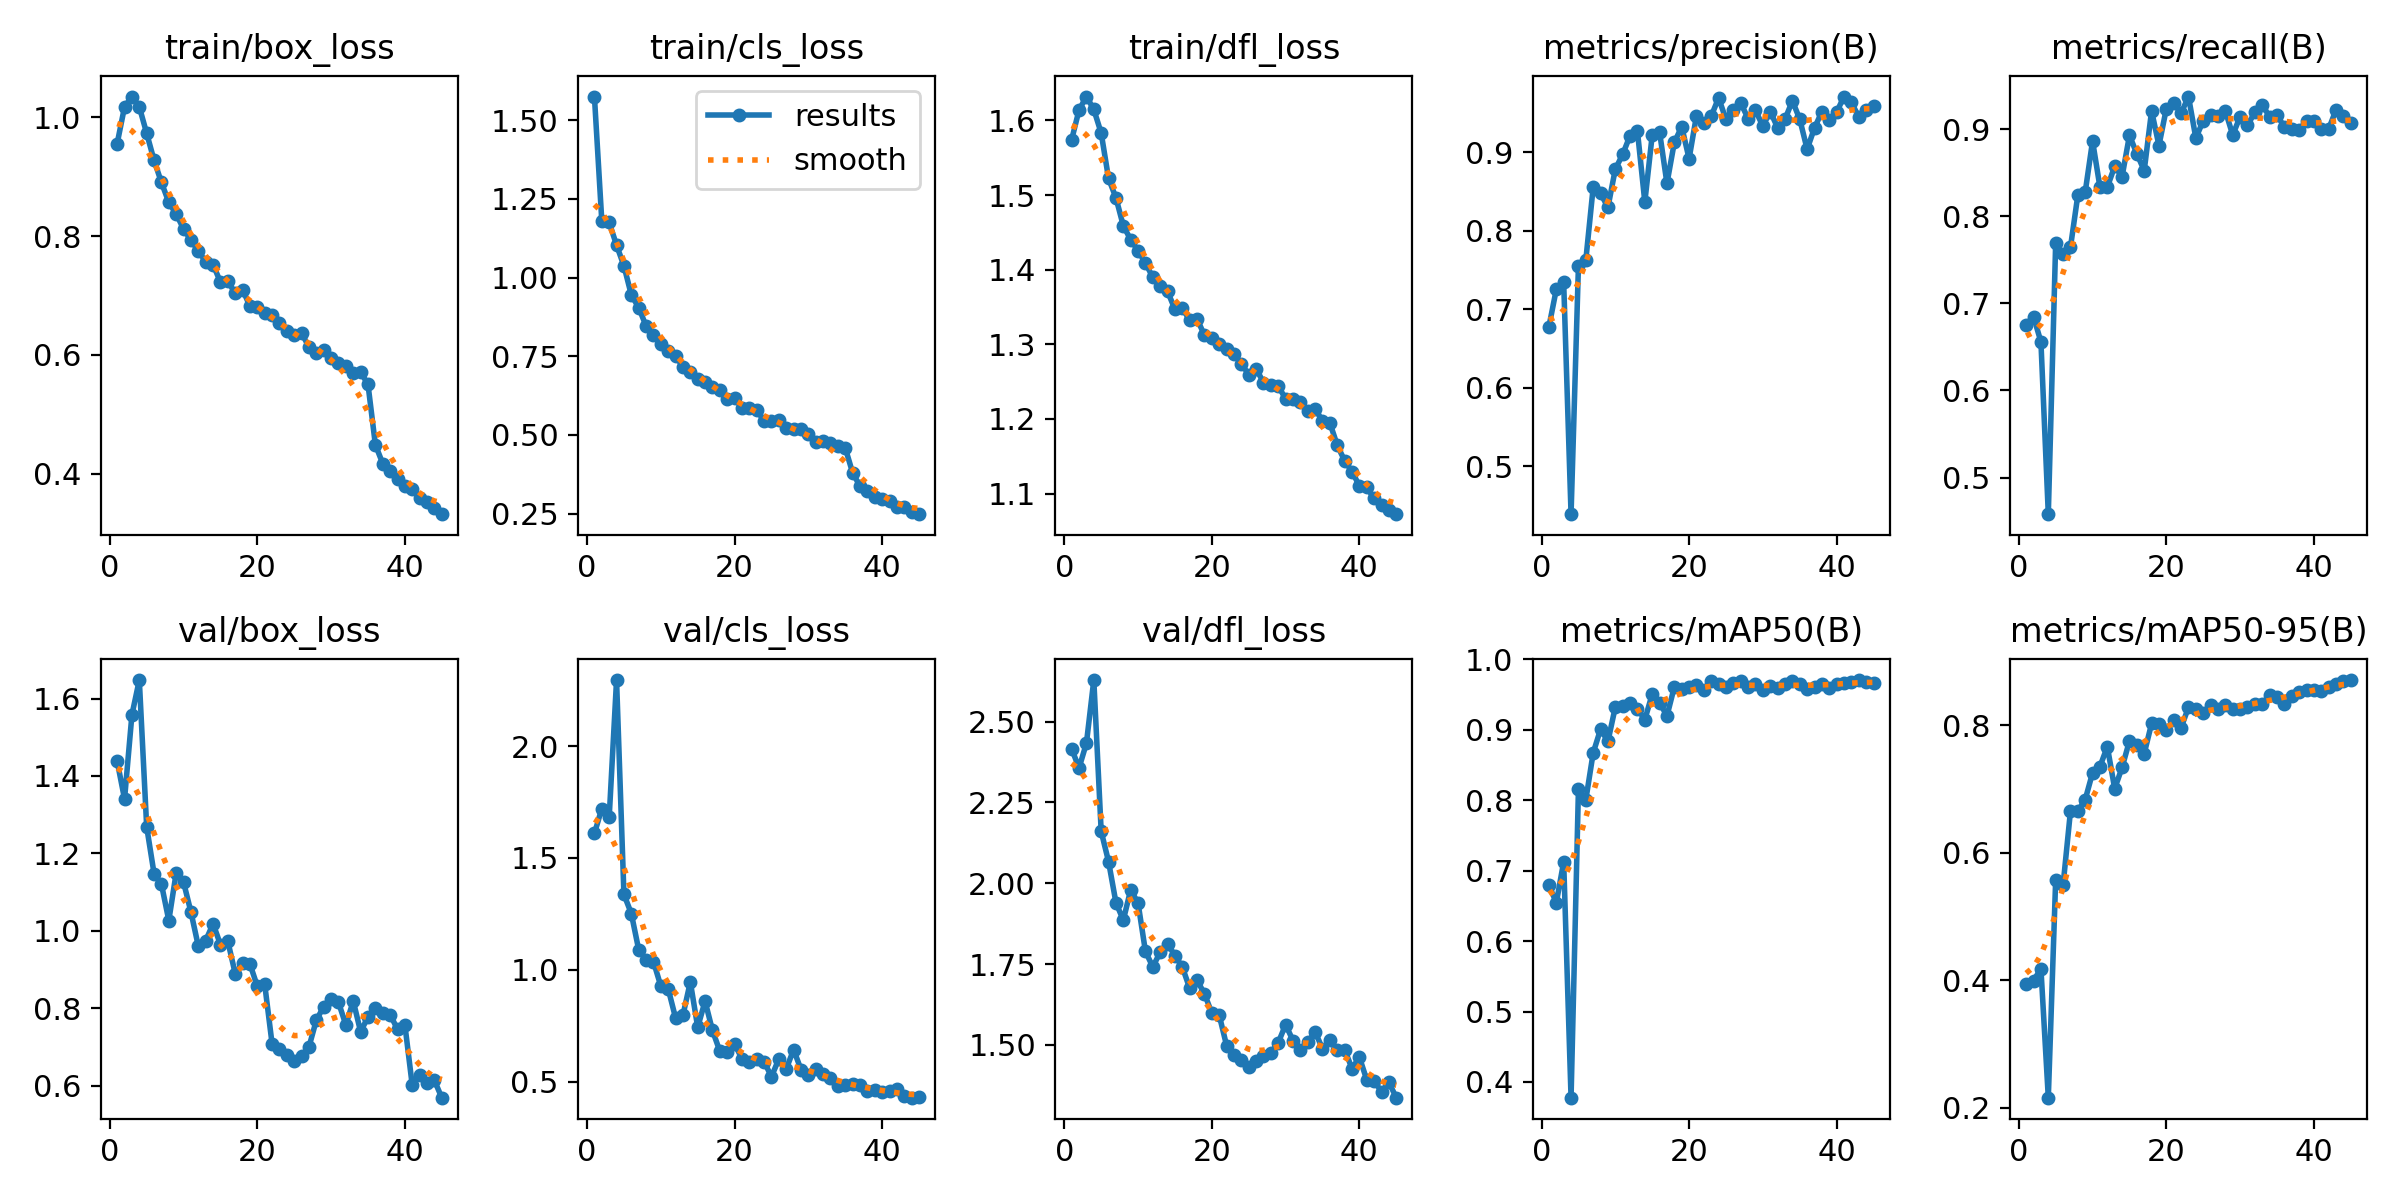

In [ ]:
%cd /content/try/datasets

from IPython.display import Image

Image(filename='runs/detect/train/results.png', width=600)

/content/try/datasets


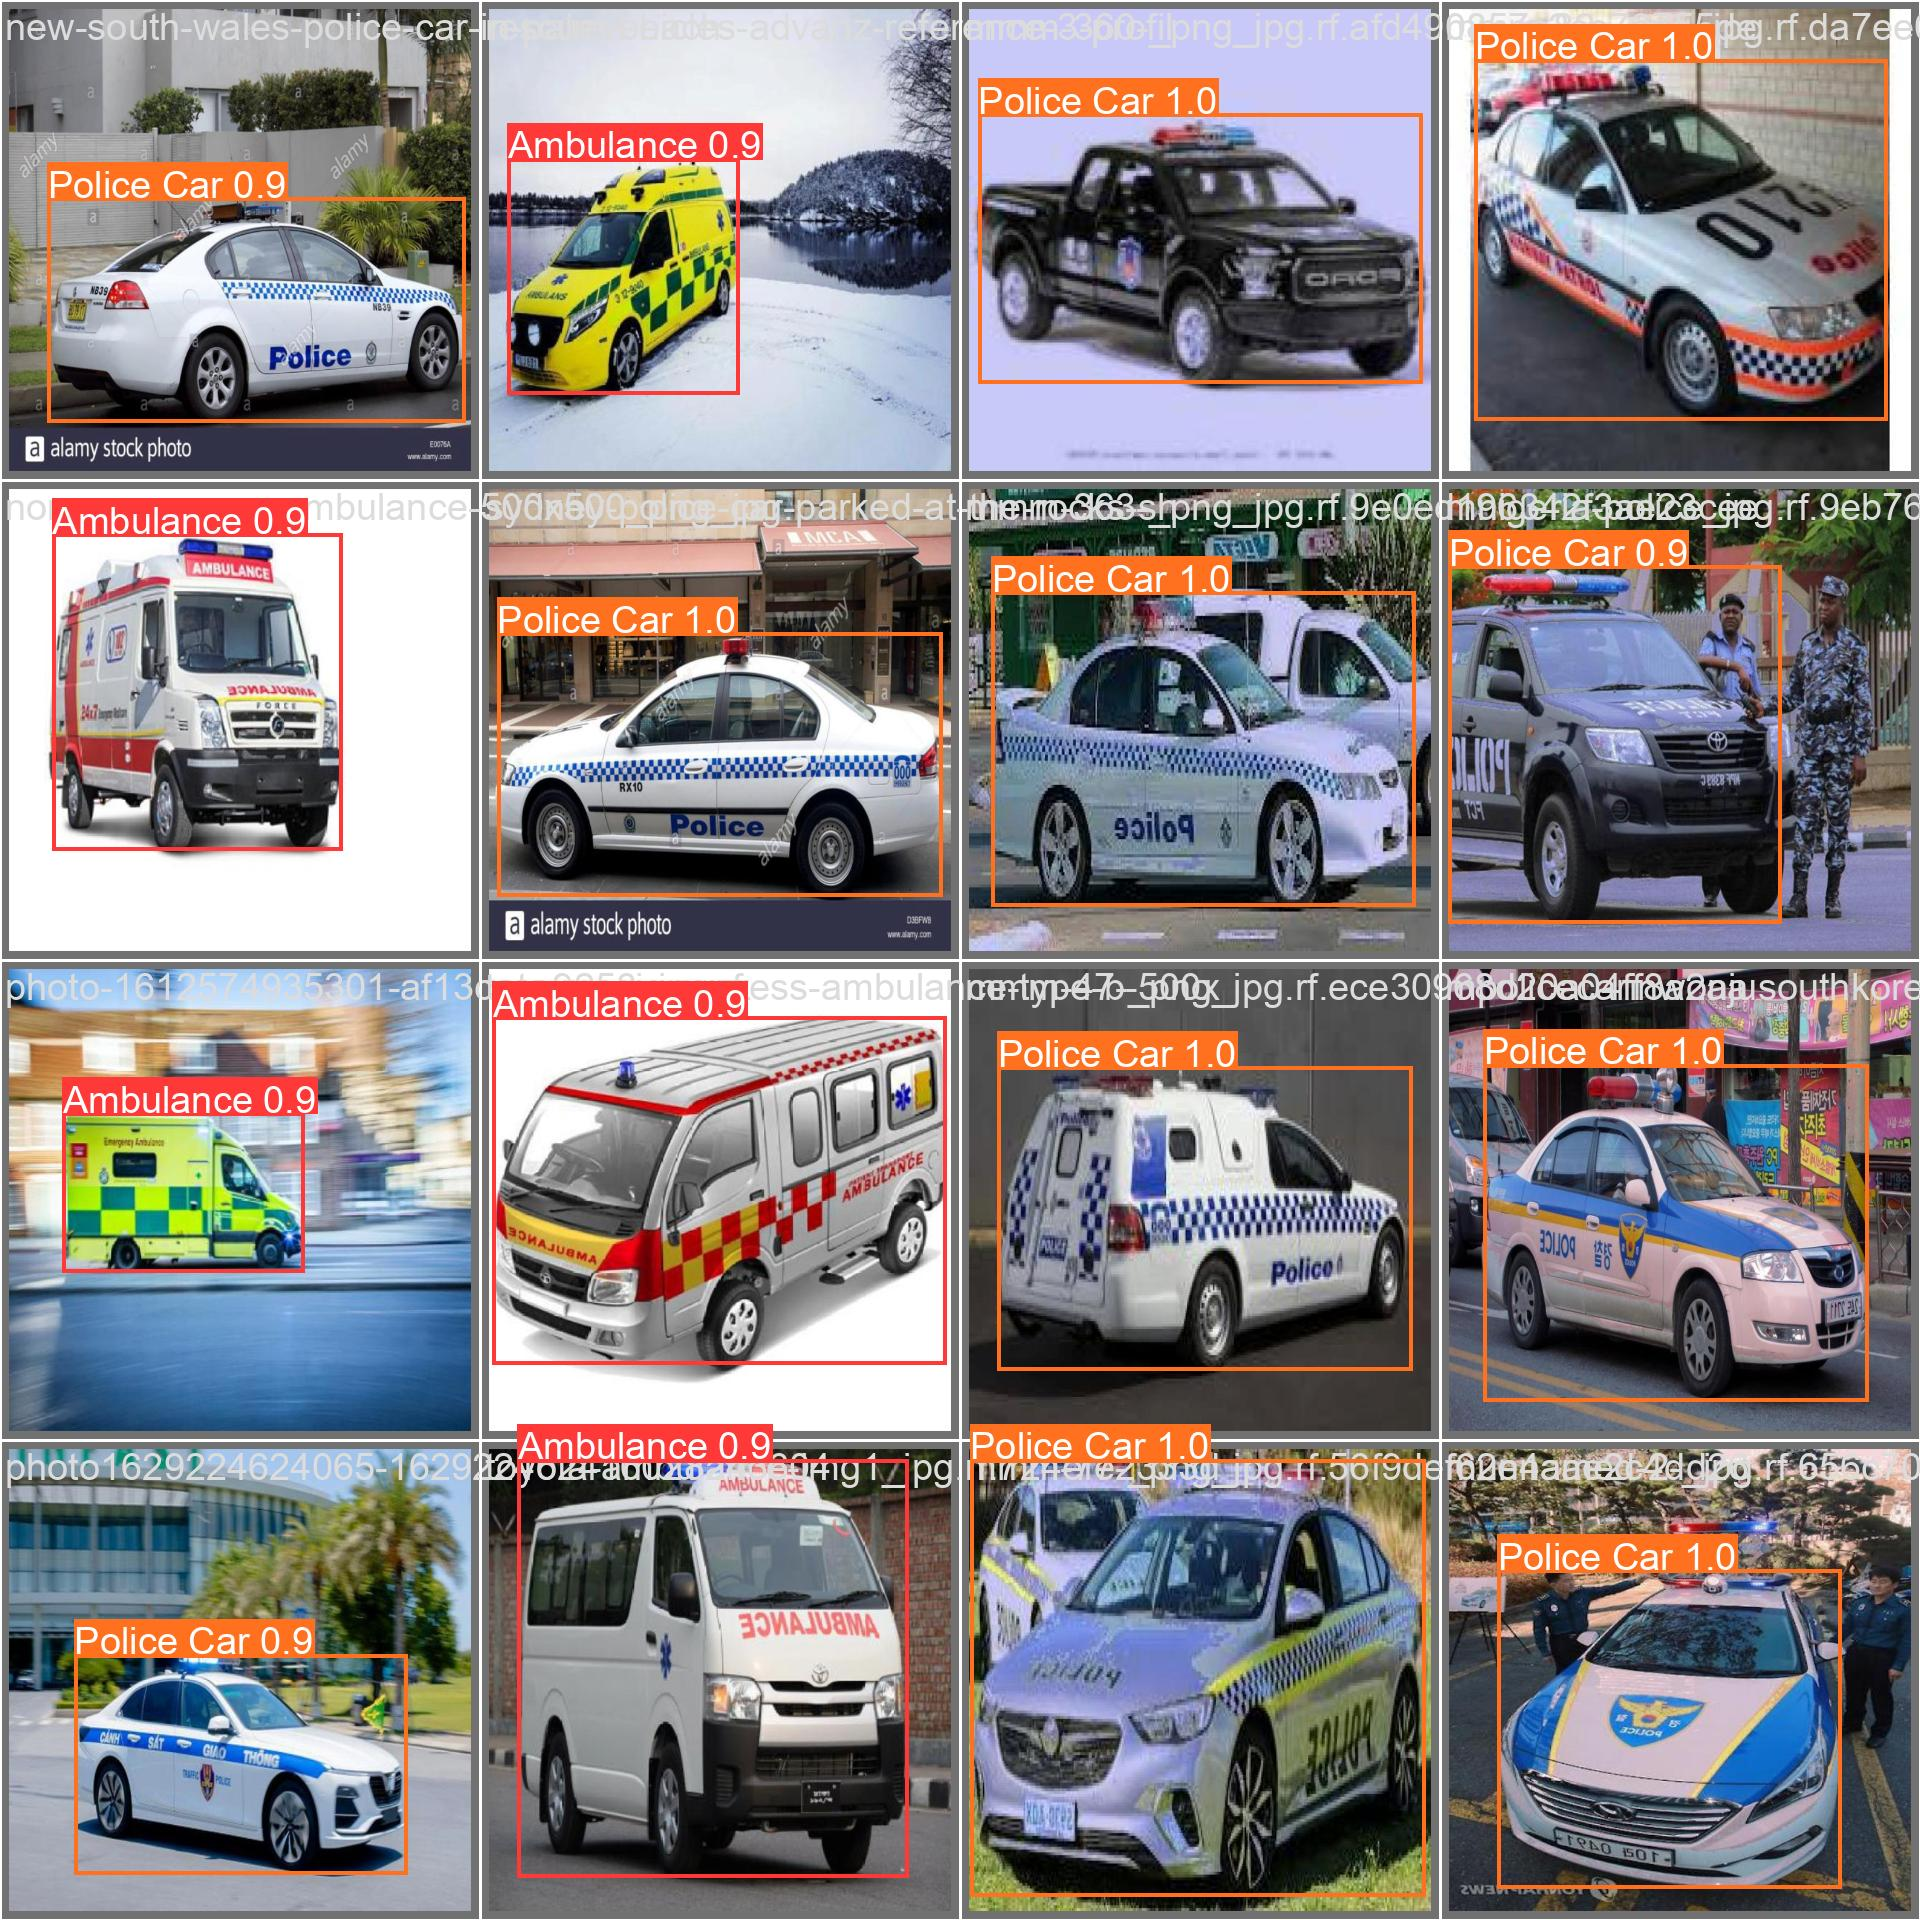

In [ ]:
%cd /content/try/datasets
Image(filename=f'runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd /content/try/datasets

!yolo task=detect mode=val model=/content/try/datasets/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content/try/datasets
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/try/datasets/Emergency_Vehicles-1/valid/labels.cache... 449 images, 0 backgrounds, 0 corrupt: 100% 449/449 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 29/29 [00:12<00:00,  2.37it/s]
                   all        449        488      0.959      0.908      0.966       0.87
             Ambulance        449        124      0.973      0.839      0.955      0.825
           Fire Engine        449        304      0.953      0.924      0.963      0.862
            Police Car        449         60       0.95       0.96       0.98      0.923
Speed: 2.0ms preprocess, 13.5ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
%cd /content/try/datasets
!yolo task=detect mode=predict model=/content/try/datasets/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content/try/datasets
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/224 /content/try/datasets/Emergency_Vehicles-1/test/images/039832d67de29788_jpg.rf.05d96659f090109a30caa9ddfb6e8e69.jpg: 800x800 1 Ambulance, 22.5ms
image 2/224 /content/try/datasets/Emergency_Vehicles-1/test/images/040d25a99e7b675b_jpg.rf.21a9de04ff407f57be636b6330ba78dd.jpg: 800x800 1 Ambulance, 22.6ms
image 3/224 /content/try/datasets/Emergency_Vehicles-1/test/images/047ab0ee2f91ca3f_jpg.rf.51c7c944dbe1eb261673468e6634d0b3.jpg: 800x800 1 Fire Engine, 22.4ms
image 4/224 /content/try/datasets/Emergency_Vehicles-1/test/images/04f5febce7212e0f_jpg.rf.d14deb6fb8152ab438ebce418707f87a.jpg: 800x800 1 Ambulance, 22.4ms
image 5/224 /content/try/datasets/Emergency_Vehicles-1/test/images/06549f313170aae2_jpg.rf.d35996024a02e3a880c2fdb4294ce996.jpg: 800x800

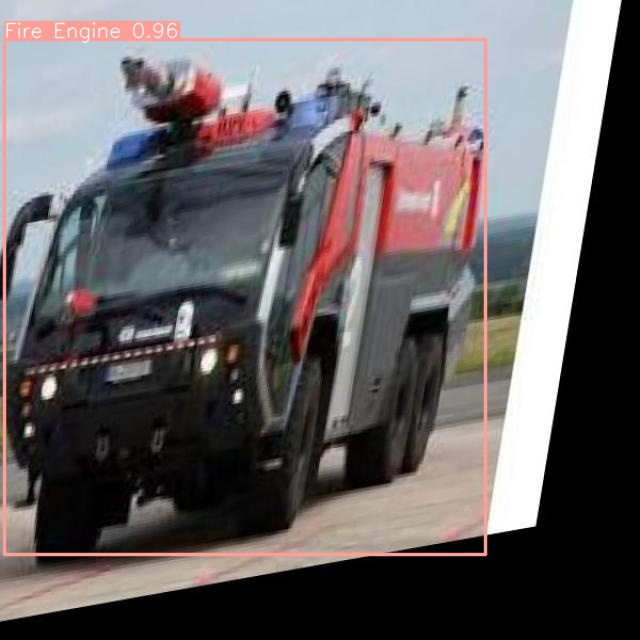

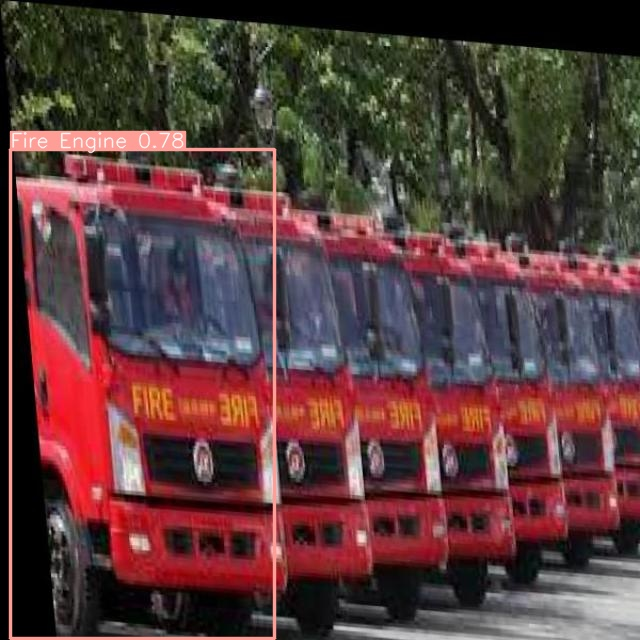

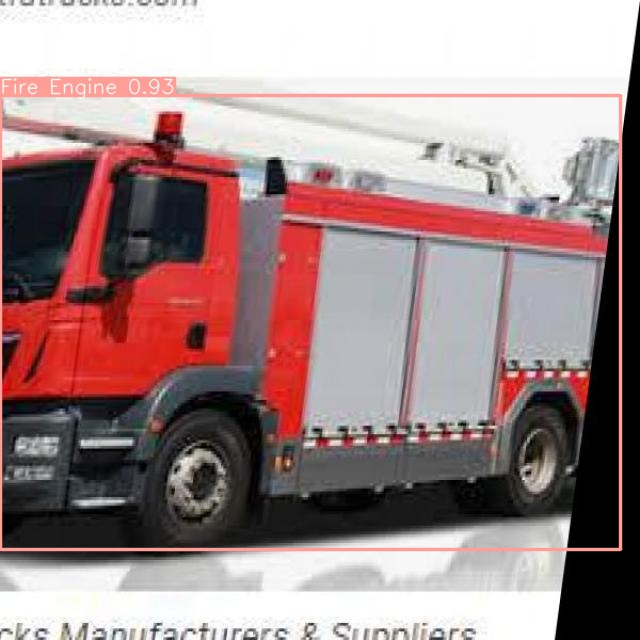

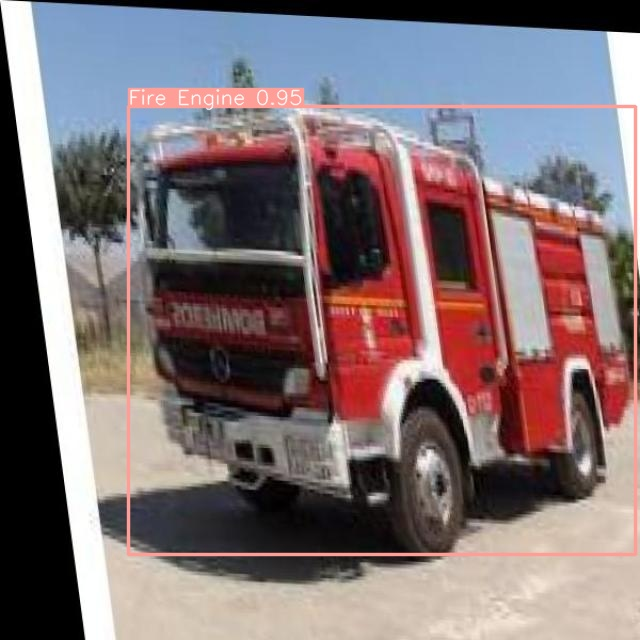

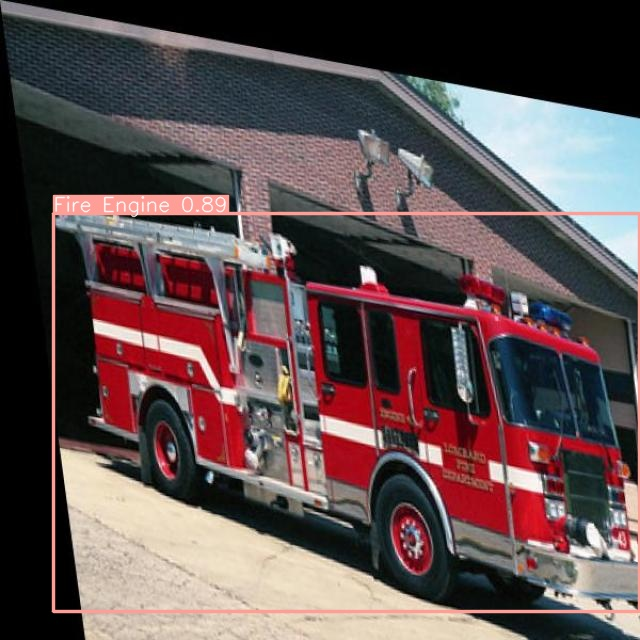

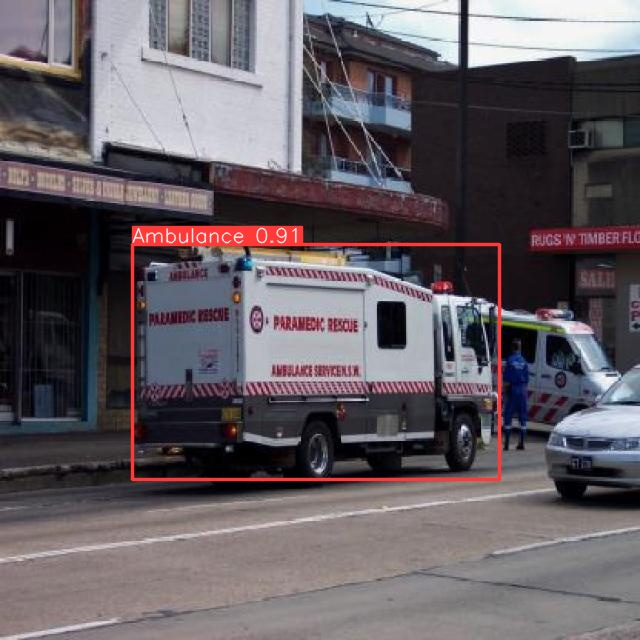

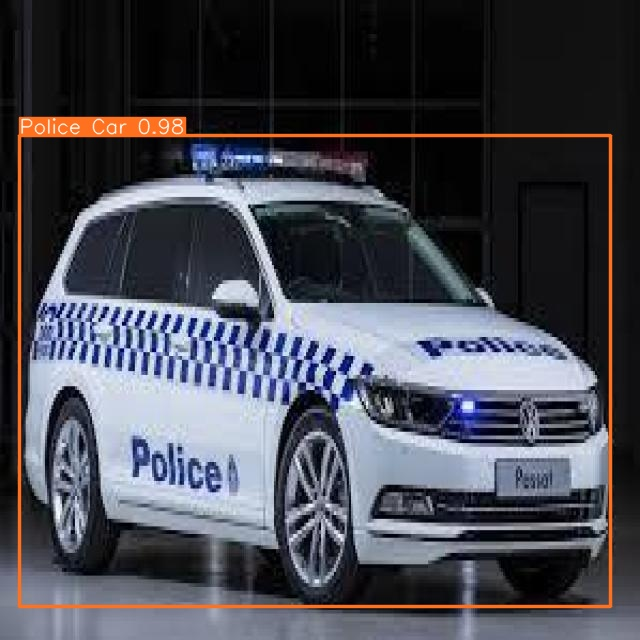

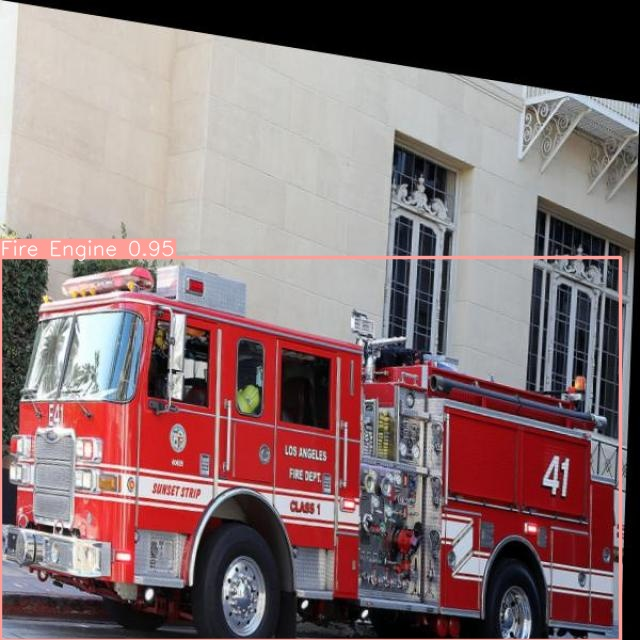

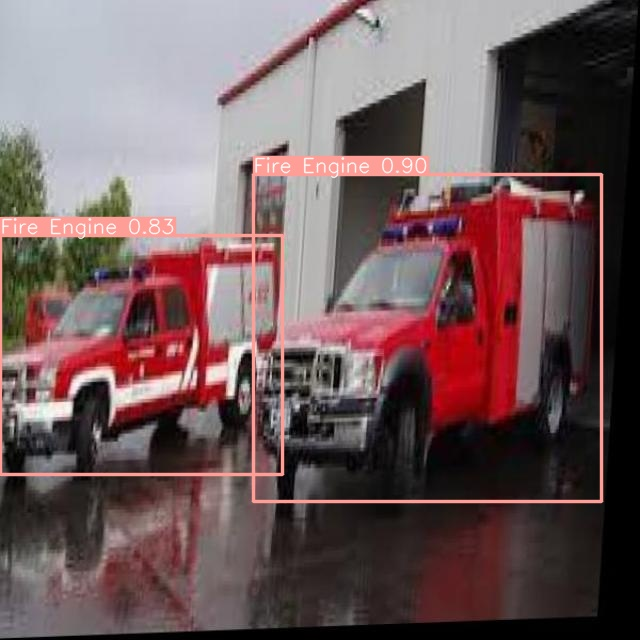

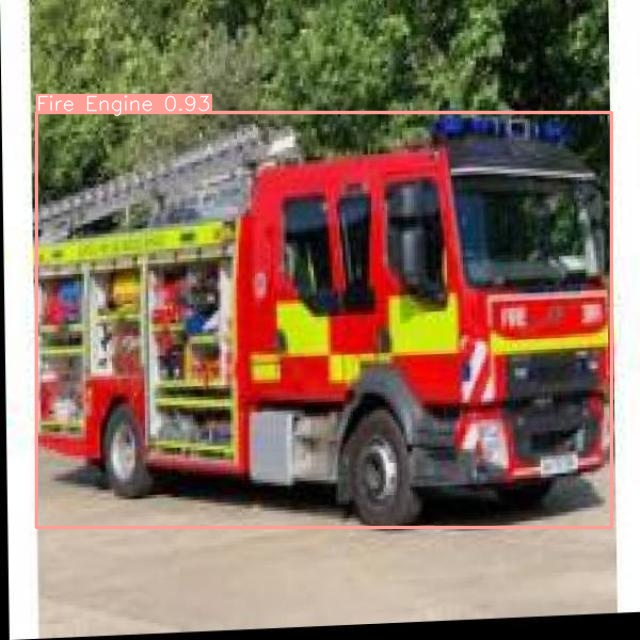

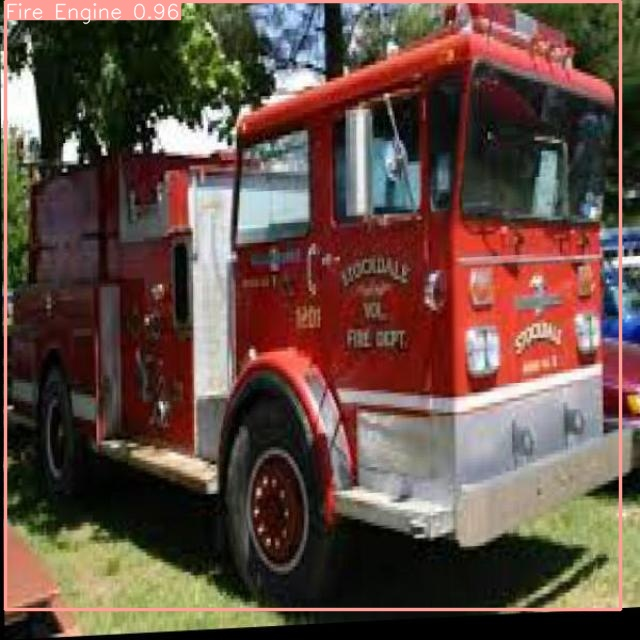

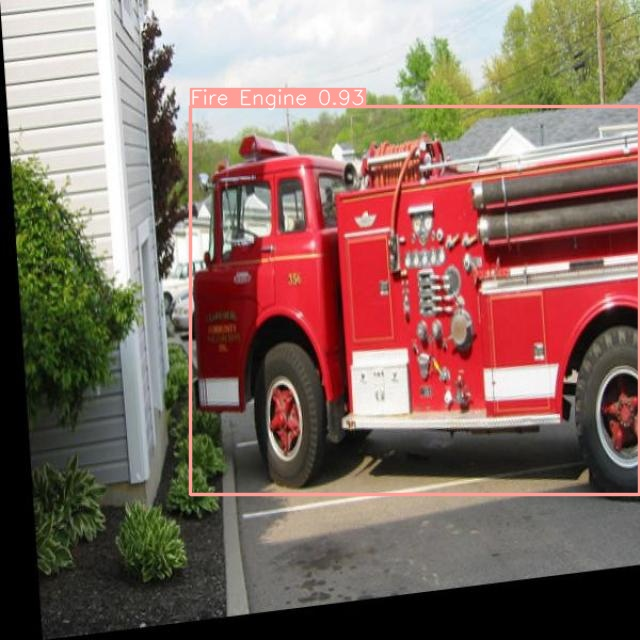

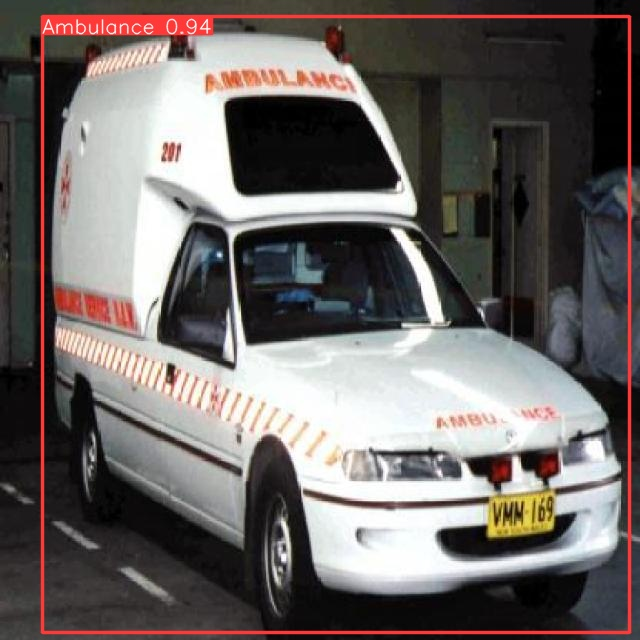

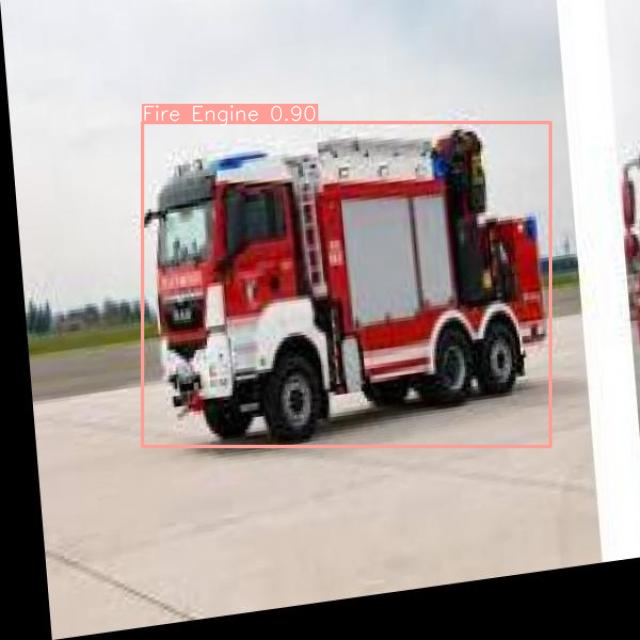

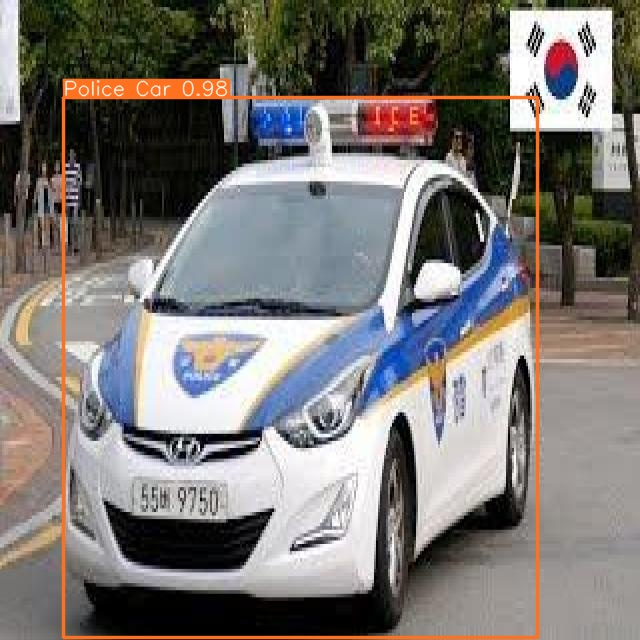

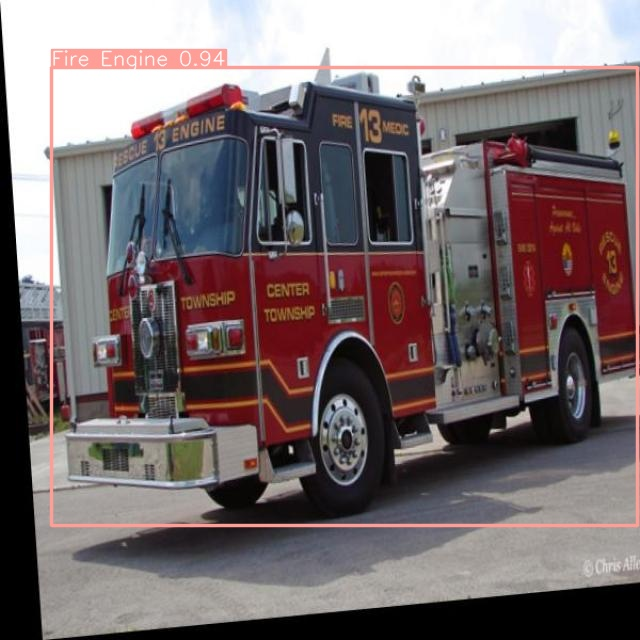

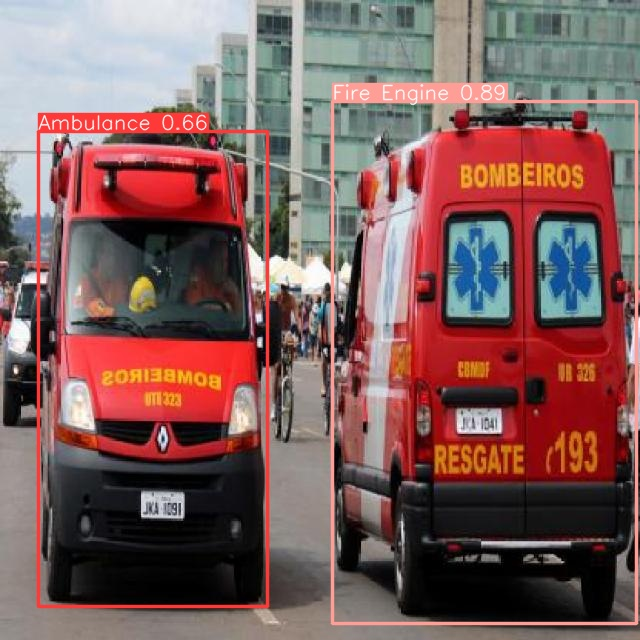

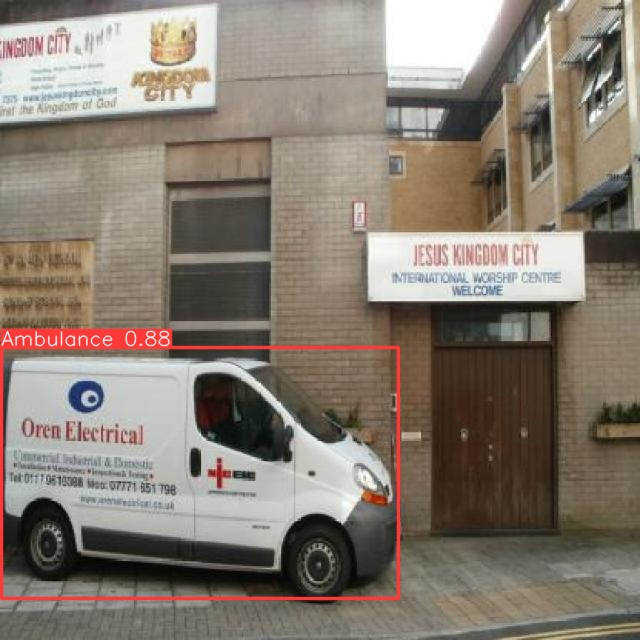

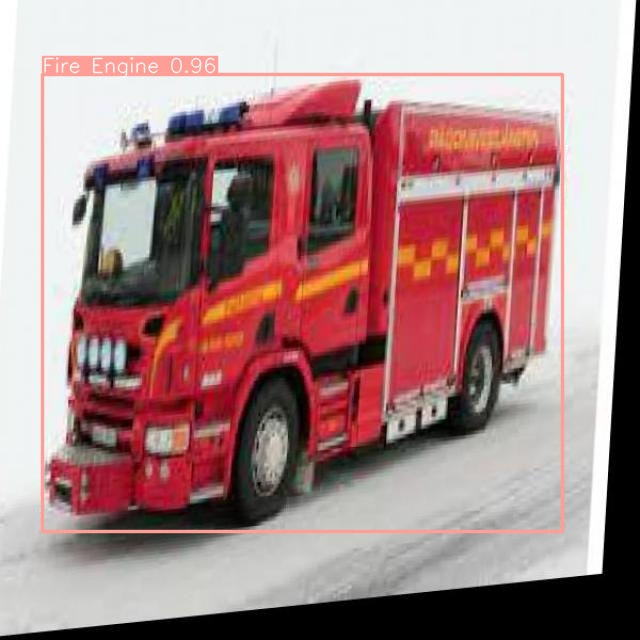

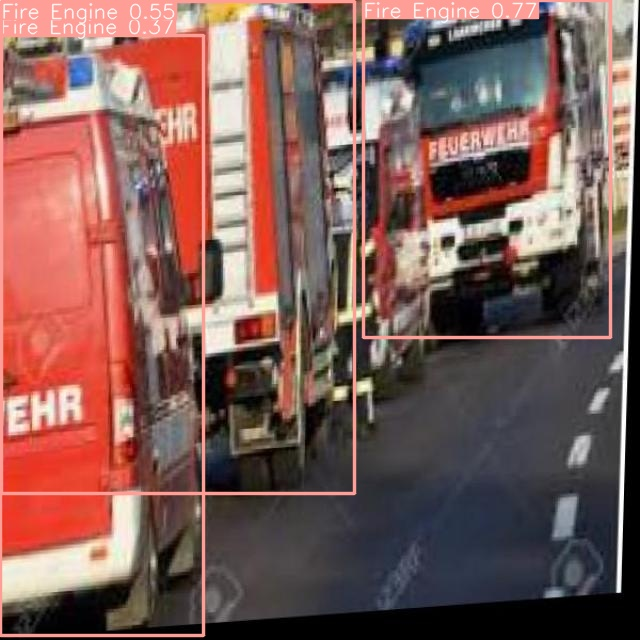

In [ ]:
import glob
from IPython.display import Image, display

# Check if any .jpg files are found
image_paths = glob.glob('/content/try/datasets/runs/detect/predict/*.jpg')

if not image_paths:
    print("No .jpg files found in the specified directory.")
else:
    # Display up to 3 images
    for image_path in image_paths[:20]:
        display(Image(filename=image_path, width=600))
        print("\n")
